In [22]:
import cv2

In [23]:
import numpy as np
import os
print(os.getcwd())

/Users/syshin/Desktop/Himedia/Himedia_project/image_classification/archive (1)/test


In [24]:
data_dir = os.chdir(os.getcwd() + "/travel_images")
data_dir

FileNotFoundError: [Errno 2] No such file or directory: '/Users/syshin/Desktop/Himedia/Himedia_project/image_classification/archive (1)/test/travel_images'

In [25]:
import glob

In [26]:
data_list = glob.glob('*.*')
len(data_list)

0

In [6]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [7]:
#string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
token = text_to_word_sequence(data_list[0], filters='().')
token, type(token)

(['architecture', '5003', 'jpg'], list)

In [8]:
label = []

In [9]:
for x in data_list:
    token = text_to_word_sequence(x, filters='().')
    label.append(token[0])
len(label), label[:5]

(35034,
 ['architecture',
  'art_and_culture',
  'travel_and_adventure',
  'travel_and_adventure',
  'art_and_culture'])

In [10]:
## 라벨인코더: 카테고리형 문자를 숫자로 자동 변환해주는 역할
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
label_encoded = encoder.fit_transform(label)
label_encoded[:5]

array([0, 1, 3, 3, 1])

In [12]:
import cv2
import matplotlib.pyplot as plt

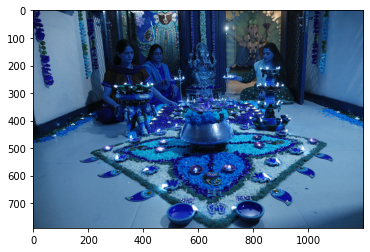

In [13]:
img = cv2.imread(data_list[1])
plt.imshow(img)

In [14]:
img.shape

(790, 1200, 3)

In [15]:
## 표준화
image = img/255
image[0][0]

array([0.0745098 , 0.09411765, 0.21568627])

In [17]:
image2 = cv2.resize(image, (data_height, data_width))
image2.shape

(150, 150, 3)

In [18]:
data_list_len = len(data_list)
data_list_len

35034

In [19]:
## 읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서
## 우리가 원하는 이미지 데이터를 만들자

def make_file(data_list, data_height, data_width, channel_n, data_list_len):
    ## 라벨링한 결과 넣어줄 1차원 리스트
    error_count = 0
    label = []
    error_list = []
    ## 4차원으로 만들어줄 4차원 리스트
    images = np.zeros((data_list_len, data_height, data_width, channel_n))
    
    ## 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징
    for i, image in enumerate(data_list):
        try:
            ##라벨링
            token = text_to_word_sequence(image)
            
            ## 이미지 읽고, 스케일링, 리사이징
            image_read = cv2.imread(image)
            image_resized = cv2.resize(image_read, (data_height, data_width)) / 255
            
            ## 에러없을시 추가
            label.append(token[0])
            images[i, :, :, :] = image_resized
        except Exception as e:
            error_count += 1
            print(data_list[i], str(e))
            error_list.append(image)
            
            
    label = np.array(label)
    print("total_number>>", data_list_len)
    print("number_of_errors>>", error_count)
    print("len(label)>>", len(label), "len(images)>>", len(images))
    return (label, images, error_list)

In [20]:
labels, images, error_list = make_file(data_list, data_height, data_width, channel_n, data_list_len)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: kno

total_number>> 35034
number_of_errors>> 0
len(label)>> 35034 len(images)>> 35034


libpng warning: iCCP: known incorrect sRGB profile


In [21]:
error_list

[]

In [22]:
labels.shape, images.shape

((35034,), (35034, 150, 150, 3))

In [23]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 1, 3, ..., 0, 0, 0]), 35034)

In [24]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(28027, 150, 150, 3) (7007, 150, 150, 3)


In [25]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))


## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model.add(Dense(4, activation='softmax')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model.summary()

Metal device set to: Apple M1 Pro


2022-06-10 10:54:59.351454: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-10 10:54:59.353370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

In [27]:
## 모델의 설정값 지정: 
# 1. 기울기 찾는데 최적의 방법 설정(옵티마이저)
# 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법 설정(loss)
# 회귀인 경우: mae
# 분류인 경우: 이진(binary_crossentropy)
#           다중(sparse_categorical_crossentropy)
# 3. fit 시킬 때 fit 시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)
model.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']
          )

In [28]:
## 공부를 시키자!!
## epoch마다 train의 loss, acc뿐만 아니라,
## test의 loss, acc을 알고 싶으면 
## fit(validation_data = (X_test, y_test))
## 조기종료(ㄷㅁ기ㅛㄴ새ㅔㅔㅑㅜㅎ):
## epoch를 실행할 때 최적의 acc인 경우, 더 이상 epoch를 수행하지 않아도 되게
## 모델 저장(checkPoint):
## 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
## 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
## 1)객체를 만들어주고, 2)fit(callbacks=[객체])
es = EarlyStopping(patience=3, restore_best_weights=True)
cp = ModelCheckpoint('/Users/syshin/Desktop/Himedia/Himedia_project/이미지분류/best_cnn1.h5')
cnn_history = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=3,
    validation_data = (X_test, y_test), 
    callbacks=[es,cp],
    verbose=2
)

Epoch 1/3


2022-06-10 10:55:54.634980: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-10 10:55:55.860392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-10 10:56:50.880896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


110/110 - 64s - loss: 1.3863 - accuracy: 0.2487 - val_loss: 1.3859 - val_accuracy: 0.2360 - 64s/epoch - 579ms/step
Epoch 2/3
110/110 - 53s - loss: 1.3863 - accuracy: 0.2477 - val_loss: 1.3859 - val_accuracy: 0.2351 - 53s/epoch - 479ms/step
Epoch 3/3
110/110 - 52s - loss: 1.3863 - accuracy: 0.2504 - val_loss: 1.3858 - val_accuracy: 0.2372 - 52s/epoch - 476ms/step


In [29]:
test_result = model.evaluate(X_test,y_test)
test_result

219/219 [==============================] - 10s 45ms/step - loss: 1.3858 - accuracy: 0.2372


[1.3858366012573242, 0.23719137907028198]

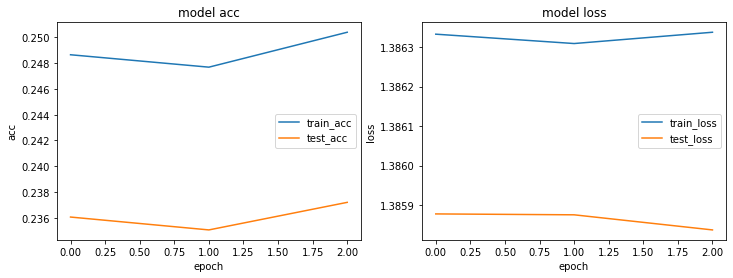

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])


In [31]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))

## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model2.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(5, activation='relu'))
model2.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model2.add(Dense(4, activation='softmax')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_7 (Dense)             (None, 512)              

In [32]:
model2.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']
          )

In [33]:
es2 = EarlyStopping(patience=3, restore_best_weights=True)
cp2 = ModelCheckpoint('/Users/syshin/Desktop/Himedia/Himedia_project/이미지분류/best_cnn2.h5')
cnn_history2 = model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=3,
    validation_data = (X_test, y_test), 
    callbacks=[es2,cp2],
    verbose=2
)

Epoch 1/3
281/281 - 69s - loss: 1.3864 - accuracy: 0.2499 - val_loss: 1.3858 - val_accuracy: 0.2439 - 69s/epoch - 246ms/step
Epoch 2/3
281/281 - 60s - loss: 1.3864 - accuracy: 0.2484 - val_loss: 1.3858 - val_accuracy: 0.2442 - 60s/epoch - 215ms/step
Epoch 3/3
281/281 - 60s - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3858 - val_accuracy: 0.2445 - 60s/epoch - 214ms/step


In [34]:
test_result2 = model2.evaluate(X_test,y_test)
test_result2

2022-06-10 11:02:54.190957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 10s 46ms/step - loss: 1.3852 - accuracy: 0.2583


[1.385189175605774, 0.2583131194114685]

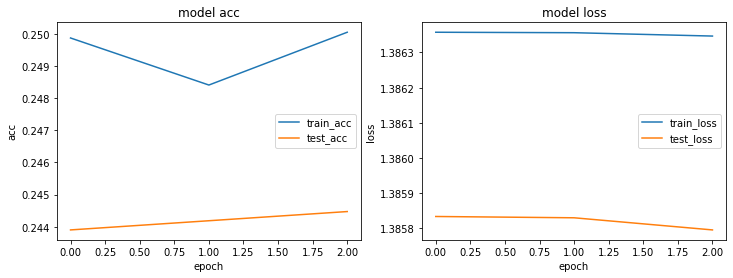

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history2.history['accuracy'])
plt.plot(cnn_history2.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history2.history['loss'])
plt.plot(cnn_history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])


In [36]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model3.add(MaxPool2D((2,2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPool2D((2,2)))

## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model3.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(5, activation='relu'))
model3.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model3.add(Dense(4, activation='softmax')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [37]:
model3.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']
          )

In [38]:
es3 = EarlyStopping(patience=3, restore_best_weights=True)
cp3 = ModelCheckpoint('/Users/syshin/Desktop/Himedia/Himedia_project/이미지분류/best_cnn3.h5')
cnn_history3 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=3,
    validation_data = (X_test, y_test), 
    callbacks=[es3,cp3],
    verbose=2
)

Epoch 1/3
219/219 - 66s - loss: 1.3863 - accuracy: 0.2523 - val_loss: 1.3858 - val_accuracy: 0.2422 - 66s/epoch - 301ms/step
Epoch 2/3
219/219 - 57s - loss: 1.3863 - accuracy: 0.2515 - val_loss: 1.3858 - val_accuracy: 0.2368 - 57s/epoch - 259ms/step
Epoch 3/3
219/219 - 56s - loss: 1.3863 - accuracy: 0.2523 - val_loss: 1.3859 - val_accuracy: 0.2378 - 56s/epoch - 258ms/step


In [39]:
test_result3 = model3.evaluate(X_test,y_test)
test_result3

  1/219 [..............................] - ETA: 2:22 - loss: 1.3680 - accuracy: 0.3438

2022-06-10 11:06:49.340455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 11s 47ms/step - loss: 1.3858 - accuracy: 0.2492


[1.3857710361480713, 0.2491793930530548]

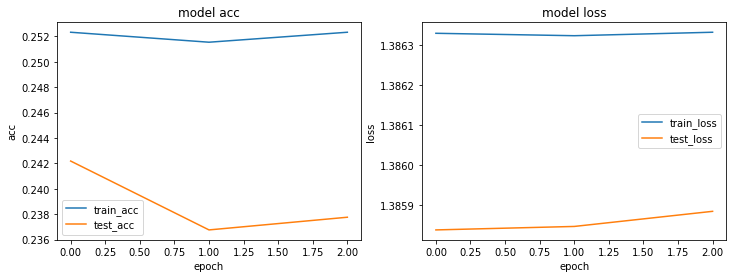

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history3.history['accuracy'])
plt.plot(cnn_history3.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history3.history['loss'])
plt.plot(cnn_history3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])

In [41]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model4.add(MaxPool2D((2,2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPool2D((2,2)))

## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model4.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(10, activation='relu'))
model4.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model4.add(Dense(4, activation='softmax')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 82944)             0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [42]:
model4.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']
          )

In [43]:
es4 = EarlyStopping(patience=3, restore_best_weights=True)
cp4 = ModelCheckpoint('/Users/syshin/Desktop/Himedia/Himedia_project/이미지분류/best_cnn4.h5')
cnn_history3 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=3,
    validation_data = (X_test, y_test), 
    callbacks=[es3,cp3],
    verbose=2
)

Epoch 1/3
219/219 - 66s - loss: 1.3863 - accuracy: 0.2504 - val_loss: 1.3859 - val_accuracy: 0.2372 - 66s/epoch - 302ms/step
Epoch 2/3
219/219 - 58s - loss: 1.3863 - accuracy: 0.2499 - val_loss: 1.3859 - val_accuracy: 0.2499 - 58s/epoch - 265ms/step
Epoch 3/3
219/219 - 57s - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3858 - val_accuracy: 0.2396 - 57s/epoch - 260ms/step


In [44]:
test_result4 = model3.evaluate(X_test,y_test)
test_result4

219/219 [==============================] - 10s 47ms/step - loss: 1.3858 - accuracy: 0.2492


[1.3857710361480713, 0.2491793930530548]

NameError: name 'cnn_history4' is not defined

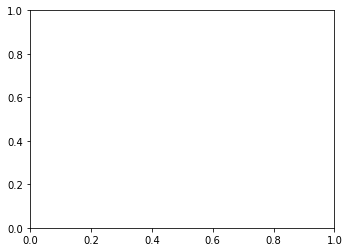

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history4.history['accuracy'])
plt.plot(cnn_history4.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history4.history['loss'])
plt.plot(cnn_history4.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])